In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

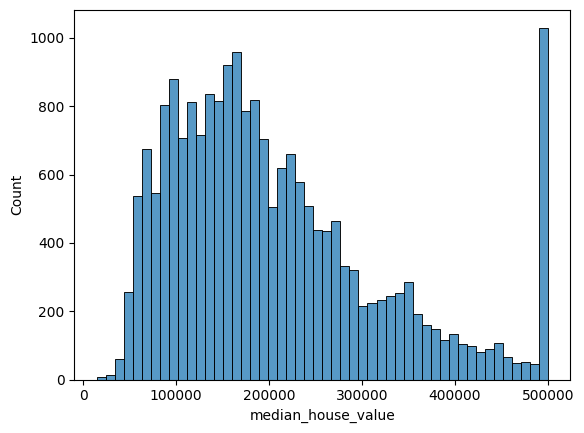

In [3]:
sns.histplot(df.median_house_value, bins=50)

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df = df[columns]
df.shape

(15687, 9)

In [6]:
df['population'].median()

np.float64(1195.0)

In [7]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(3137, 3137, 9413)

In [8]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df.shape

(15687, 9)

In [9]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [10]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [11]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [12]:
def train_linear_regression(X_train, y_train):
    '''β = (X^T * X)^-1 * X^T * y'''
    ones = np.ones(X_train.shape[0])
    X = np.column_stack([ones, X_train])

    XTX = X.T.dot(X)
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y_train)
    
    return w_full[0], w_full[1:]

def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [13]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
X_train = df_train.fillna(0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [14]:
w0, w

(np.float64(-9.763249477872478),
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

<Axes: ylabel='Count'>

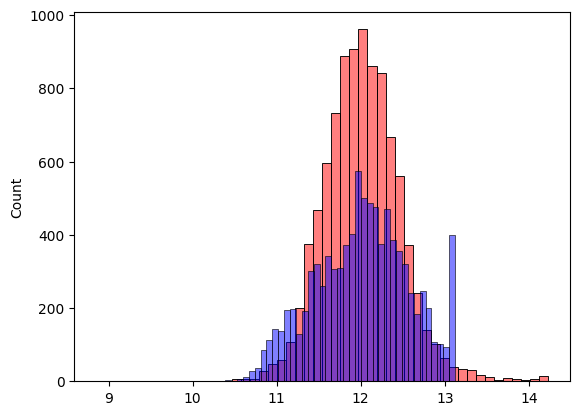

In [15]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [16]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.34)

In [17]:
mean_df = df_train.copy()
mean_df.isnull().sum()
mean_value = mean_df['total_bedrooms'].mean() 
no_na = mean_df['total_bedrooms'].fillna(value=mean_value) 
mean_df['total_bedrooms'] = no_na 
mean_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [18]:
w0, w = train_linear_regression(mean_df, y_train)
y_pred = w0 + mean_df.dot(w)

<Axes: ylabel='Count'>

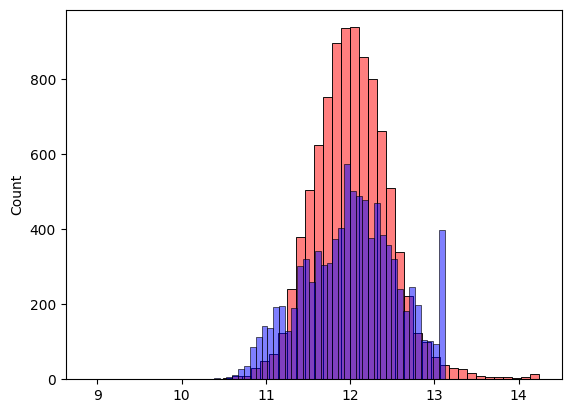

In [19]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [23]:
X_val_mean = df_val.fillna(value=mean_value).values
y_pred = w0 + X_val_mean.dot(w)
rmse(y_val, y_pred)

np.float64(0.34)

In [22]:
def train_linear_regression_reg(X, y, r_values):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    results = []
    
    for r in r_values:
        XTX_reg = XTX + r * np.eye(XTX.shape[0])
        XTX_inv = np.linalg.inv(XTX_reg)
        w_full = XTX_inv.dot(X.T).dot(y)
        w0, w = w_full[0], w_full[1:]
        results.append((w0, w))
    
    return results

In [25]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
results = train_linear_regression_reg(X_train, y_train, r_values)

In [27]:
for i, (w0, w) in enumerate(results):
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print(f"For r = {r_values[i]}: RMSE = {rmse_val}")

For r = 0: RMSE = 0.34
For r = 1e-06: RMSE = 0.34
For r = 0.0001: RMSE = 0.34
For r = 0.001: RMSE = 0.34
For r = 0.01: RMSE = 0.34
For r = 0.1: RMSE = 0.34
For r = 1: RMSE = 0.34
For r = 5: RMSE = 0.35
For r = 10: RMSE = 0.35


In [28]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results_seed = []

for seed in seed_values:
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    
    results_seed.append((seed, w0, w, rmse_val))


In [29]:
results_df = pd.DataFrame(results_seed, columns=['Seed', 'w0', 'w', 'RMSE'])
results_df

,Seed,w0,w,RMSE
0,0,12.320000,"[0.00212783886505666, 0.0034483918804863933, 8...",0.57
1,1,11.783947,"[-0.00390954368563662, -0.0030854935549882493,...",0.57
2,2,11.888909,"[-0.0009494367389674224, -0.002007077673213706...",0.57
3,3,12.010140,"[0.0003691789154458456, 0.00014027515785259637...",0.57
4,4,12.081972,"[-0.003904707902100423, -0.0006691668485640984...",0.57
5,5,13.685553,"[0.017552262194509612, 0.01974613521372865, 0....",0.57
6,6,12.167904,"[0.00021575428620961056, 0.0012146372598158812...",0.57
7,7,11.585704,"[-0.001280947769346414, -0.0037622932632426663...",0.57
8,8,11.780300,"[-0.007057471713989776, -0.0041536522877714255...",0.57
9,9,11.058641,"[-0.011334132043108553, -0.011471786788672127,...",0.57


In [30]:
round(np.std(results_df['RMSE']),3)

np.float64(0.0)

In [31]:
n_test = int(n * 0.3)
n_train = n - n_test
np.random.seed(9)
np.random.shuffle(idx)
test_set = df.iloc[idx[:n_test]]
train_set = df.iloc[idx[n_test:]]

train_set = df_train.reset_index(drop=True)
test_set = df_test.reset_index(drop=True)
df.shape

y_train = np.log1p(train_set.median_house_value.values)
y_test = np.log1p(test_set.median_house_value.values)

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

train_linear_regression_reg(df_train, y_train, r=0.001)
y_pred = w0 + df_test.fillna(0).dot(w)
rmse(y_test, y_pred)

np.float64(0.57)